# Fundamentals of Data Analysis Winter 2023 Tasks

**Author: Nur Bujang**

tasks.ipynb
***

## Task 1 : Collatz Conjecture
> The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer x and  repeatedly apply the function f ( x ) below, you al ways get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .

\begin{align*}
f(x) = \begin{cases} 
    x \div 2 & \text{if } x \text{ is even} \\
    3x + 1 & \text{if } x \text{ is odd}
\end{cases}
\end{align*}

> For example, starting with the value 10, which is an even number, we divide it by 2 to get 5. Then 5 is an odd number so, we multiply by 3 and add 1 to get 16. Then we repeatedly divide by 2 to get 8, 4, 2, 1. **Once we are at 1, we go back to 4 and get stuck in the repeating sequence 4, 2, 1 as we suspected.**

### Task Description:
> The task is to verify, using Python, that the Collatz conjecture is true for the first 10000 positive integers.


In [ ]:
def collatz(x):
    
    clist = [x] # numbers will be in a list

    while x != 1:
        if x % 2 == 0:
            x = x // 2 # If x is even, divide it by two
        else:
            x = (3 * x) + 1 # if x is odd, multiply by 3, then add 1
        clist.append(x) # list will append

    return clist

In [ ]:
# for verification of the first 10000 positive integers

def verify_collatz(limit):
    for i in range(1, limit + 1):
        clist = collatz(i)

# if NOT verified, output will NOT end with 1
    if clist[-1:] != [1]: # slicing and comparing
        print(f"The Collatz Conjecture is not true for x = {i}")
        return
    else:
        print("The Collatz Conjecture is true the first", limit, "positive integers.")

verify_collatz(10000) # call the function 

## Task 2 : Penguins Data Set Variables
> Give an overview of the famous penguins data set and explain the types of variables it contains. 

### Task Description: 
> The task is to suggest the types of variables that should be used to model them in Python and to explain your rationale.

In [ ]:
import numpy as np # for computational operations
import pandas as pd # for data loading from other sources and processing

In [ ]:
df = pd.read_csv('penguins.csv') # import penguins.csv
df.head() # show the default first few lines of the dataframe

df.dtypes will provide the data type of each column. 

df.info() will give an output containing the number of rows and columns, column names and their data types and the number of non-null (not missing) values of each column. 

In [ ]:
data_types = df.dtypes # OR df.info()
print(data_types)

From the output, the first (species), second (island) and seventh (sex) columns are objects. These objects are strings. String is a more specialized text data type compared to the generic object data type. Strings are not categorical data type but they can be made into categories. In this instance, it is a categorical data type, which is a type of qualitative data, meaning it can only fall into a select group. The three species are Adelie, Chinstrap, and Gentoo. The three islands are Torgersen, Dream, and Biscoe. The sex are either "Male" or "Female". Hence, the species, island and sex are nominal types of categorical data which has no order or ranking. 

The third (bill length), fourth (bill depth), fifth (flipper length) and sixth (body mass) columns are 64-bit floating-point numbers. It is a continuous data type, which is a type of quantitative data. These penguin body part measurements and weight can take an infinite value within a certain range. These are measured in ratio scale, which has equal intervals between values and has a true zero point.

In [ ]:
columns_to_check = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for column_name in columns_to_check:
    element = df.at[0, column_name] # row 0
    if isinstance(element, int):
        print(f"{column_name} column is an int.")
    else:
        print(f"{column_name} column is not an int.")

However, the penguins.csv file shows that the flipper length and body mass are int values. Why do they output as floats?

To check if the numeric columns contain int values and the object columns contain string values:

In [ ]:
numeric_columns = [] 
string_columns = []

for c in df.columns:
    if ('mm' in c) or ('g' in c): #  if there is mm or g in the column name, add to a numeric list
        numeric_columns.append(c) 
    else: 
        string_columns.append(c) # if not, put it in another list

print(string_columns)
print(numeric_columns)

for s in string_columns:
    print(s, df[s].astype('category').cat.categories) # print categories in string columns

for n in numeric_columns:
    try:
        df[n].astype(int) # run a code that might cause exceptions
    except:
        print(f'column {n} cannot be converted to int.') # run this code when there is an exception
        print(f'does {n} have a null value?', df[n].isna().any()) # does this column contain a missing value?
    else:
        print(f'column {n} can be converted to int') # run this code if there are no exceptions


Null values cannot be converted to integer. Hence, the reason why the columns flipper length and body mass are considered as floats.

The rationale for selecting variable types for modeling depends on the question and types of analysis we want to perform. For example, we can use all the quantitative data to predict species classification and in regression analysis, where we can predict one variable from other features. Different variable types will also determine the appropriate type of data visualization techniques, such as pie charts, scatter plots and histograms. Understanding and specifying data types is important for the right analysis and to ensure that the operations are performed correctly.

## **Task 3 : Penguins Data Set Distribution Model** 
> For each of the variables in the penguins data set:

### Task Description:
> The task is to suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

We use data visualization and hypothesis testing to validate the distribution for each variable.

In [9]:
import numpy as np # for computational operations, generating data samples
import pandas as pd # for data loading from other sources and processing
import matplotlib.pyplot as plt # for data plotting and distribution fitting
import seaborn as sns # for data plotting and distribution fitting
from scipy import stats
from scipy.stats import normaltest

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv') # import penguins.csv from Waskom (2022)
# df.head() # to show the default first few lines of the dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Columns species, island and sex are nominal categorical variables, so no probability distributions are applicable.

Probability distributions only apply on numerical columns bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_g.

##### FOR COLUMN bill_length_mm:

In [ ]:
df['bill_length_mm'].hist() 

# Output: maybe a bimodal distribution

In [ ]:
# OR

bill_length_mm_array = df['bill_length_mm'].values
# print(bill_length_mm_array)

# Create a histogram and plot the fitted normal distribution
sns.histplot(bill_length_mm_array, kde=True, color='blue', label='Data')
plt.show()

# Output: looks like a bimodal distribution

In [16]:
# Perform a normality test to check for bimodality
statistic, p_value = normaltest(df['bill_length_mm'])

alpha = 0.05 # Set a significance level, reject the null hypothesis usually at alpha = 0.05 (5%)

# Check if the p-value is below the significance level
if p_value < alpha:
    print("The distribution is likely bimodal.")
else:
    print("The distribution does not appear bimodal.")

The distribution does not appear bimodal.


In [ ]:
# Try normal distribution

df['bill_length_mm'].describe() # to get the mean and standard deviation

In [ ]:
known_params = {'loc': 43.92, 'scale': 5.46} # create a dictionary with the values above

In [ ]:
es = stats.goodness_of_fit(
                        stats.norm, df['bill_length_mm'], # to see if the data follows a normal distribution
                        known_params=known_params, # assuming the mean and std from the data
                      statistic='ks' # ks=kolmogorov-smirnov, a test for goodness of fit
                      )

res.statistic, res.pvalue # statistic gives the actual value, pvalue gives the significance of the actual value

# reject the null hypothesis usually at alpha = 0.05 (5%)

# Output: bill_length_mm has a normal distribution


##### FOR COLUMN bill_depth_mm:

In [ ]:
df['bill_depth_mm'].hist()

In [ ]:
df['bill_depth_mm'].describe() # to get the mean and standard deviation

In [ ]:
known_params = {'loc': 17.15, 'scale': 1.97} # create a dictionary with the values above

In [ ]:
res = stats.goodness_of_fit(
                        stats.norm, df['bill_depth_mm'], # to see if the data follows a normal distribution
                        known_params=known_params, # assuming the mean and std from the data
                      statistic='ks' # ks=kolmogorov-smirnov, a test for goodness of fit
                      )

res.statistic, res.pvalue # statistic gives the actual value, pvalue gives the significance of the actual value

# reject the null hypothesis usually at alpha = 0.05 (5%)

# Output: bill_depth_mm has a normal distribution

##### FOR COLUMN flipper_length_mm:

<Axes: >

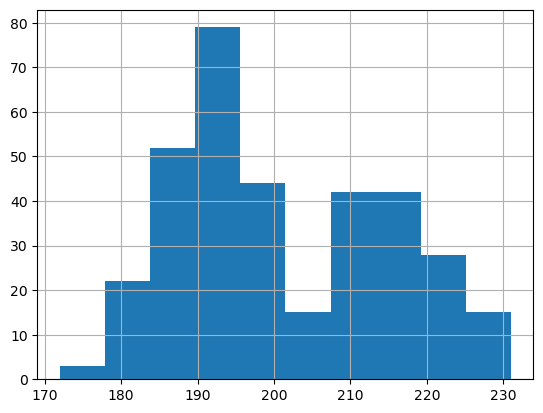

In [12]:
df['flipper_length_mm'].hist() 

# Output: almost clearly a bimodal distribution

In [15]:
# Perform a normality test to check for bimodality
statistic, p_value = normaltest(df['flipper_length_mm'])

alpha = 0.05 # Set a significance level

# Check if the p-value is below the significance level
if p_value < alpha:
    print("The distribution is likely bimodal.")
else:
    print("The distribution does not appear bimodal.")



The distribution does not appear bimodal.


In [18]:
# Try normal distribution

df['flipper_length_mm'].describe() # to get the mean and standard deviation

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [20]:
known_params = {'loc': 200.92, 'scale': 14.06} # create a dictionary with the values above

In [21]:
res = stats.goodness_of_fit(
                        stats.norm, df['flipper_length_mm'], # to see if the data follows a normal distribution
                        known_params=known_params, # assuming the mean and std from the data
                      statistic='ks' # ks=kolmogorov-smirnov, a test for goodness of fit
                      )

res.statistic, res.pvalue # statistic gives the actual value, pvalue gives the significance of the actual value

# reject the null hypothesis usually at alpha = 0.05 (5%)

# Output: flipper_length_mm has a normal distribution

(nan, 0.0001)

##### FOR COLUMN body_mass_g:

In [ ]:
df['body_mass_g'].hist() 

# poisson distribution, but left-skewed

## **Task 4 : Head Probability** 
> Suppose you are flipping two coins, each with a probability p of giving heads.

### Task Description:
> The task is to plot the entropy of the total number of heads versus p.

## **Task 5 : Penguins Data Set Plots** 
> Penguins data set.

### Task Description:
> The task is to create an appropriate individual plot for each of the variables in the penguin data set.

***

## End